Highest Accuracy: 0.9182 (Number of Previous Steps: 43)
Highest F1 Score: 0.8648 (Number of Previous Steps: 43)


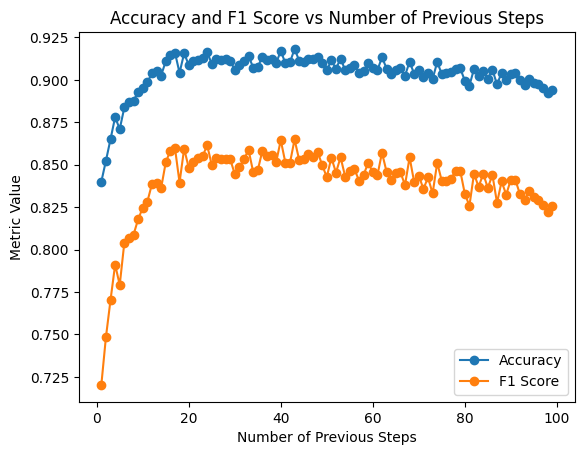

In [ ]:
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, f1_score
import numpy as np
import joblib

def create_features_with_previous_steps(data, num_previous_steps):
    features = []
    labels = []

    for i in range(num_previous_steps, len(data)):
        current_entry = data[i]
        previous_entries = [data[i - j] for j in range(1, num_previous_steps + 1)]

        combined_features = [current_entry[0], current_entry[1], current_entry[2]]
        for prev_entry in previous_entries:
            combined_features.extend([prev_entry[0], prev_entry[1], prev_entry[2]])

        features.append(combined_features)
        labels.append(current_entry[3])

    return np.array(features), np.array(labels)

train_file_path = '/content/received_data_with_gravity.txt'
with open(train_file_path, 'r') as train_file:
    train_lines = train_file.readlines()

train_data = [(float(entry.split('(')[1].split(',')[0]),
               float(entry.split(',')[1]),
               float(entry.split(',')[2].split(')')[0]),
               int(entry[0]))
              for entry in train_lines if entry.startswith('0') or entry.startswith('1')]

test_file_path = '/content/received_data_with_gravity(1).txt'
with open(test_file_path, 'r') as test_file:
    test_lines = test_file.readlines()

test_data = [(float(entry.split('(')[1].split(',')[0]),
              float(entry.split(',')[1]),
              float(entry.split(',')[2].split(')')[0]),
              int(entry[0]))
             for entry in test_lines if entry.startswith('0') or entry.startswith('1')]

num_previous_steps_range = range(1, 100)
accuracies = []
f1_scores = []

for num_previous_steps in num_previous_steps_range:
    X_train, y_train = create_features_with_previous_steps(train_data, num_previous_steps)
    X_test, y_test = create_features_with_previous_steps(test_data, num_previous_steps)

    rf_classifier = RandomForestClassifier(n_estimators=10, random_state=42)
    rf_classifier.fit(X_train, y_train)

    predictions = rf_classifier.predict(X_test)

    accuracy = accuracy_score(y_test, predictions)
    f1 = f1_score(y_test, predictions)

    accuracies.append(accuracy)
    f1_scores.append(f1)

max_accuracy = max(accuracies)
best_num_previous_steps_accuracy = num_previous_steps_range[accuracies.index(max_accuracy)]

max_f1 = max(f1_scores)
best_num_previous_steps_f1 = num_previous_steps_range[f1_scores.index(max_f1)]

print(f"Highest Accuracy: {max_accuracy:.4f} (Number of Previous Steps: {best_num_previous_steps_accuracy})")
print(f"Highest F1 Score: {max_f1:.4f} (Number of Previous Steps: {best_num_previous_steps_f1})")

plt.plot(num_previous_steps_range, accuracies, label='Accuracy', marker='o')
plt.plot(num_previous_steps_range, f1_scores, label='F1 Score', marker='o')
plt.xlabel('Number of Previous Steps')
plt.ylabel('Metric Value')
plt.title('Accuracy and F1 Score vs Number of Previous Steps')
plt.legend()
plt.show()


Highest Accuracy: 0.9182 (Number of Previous Steps: 43)


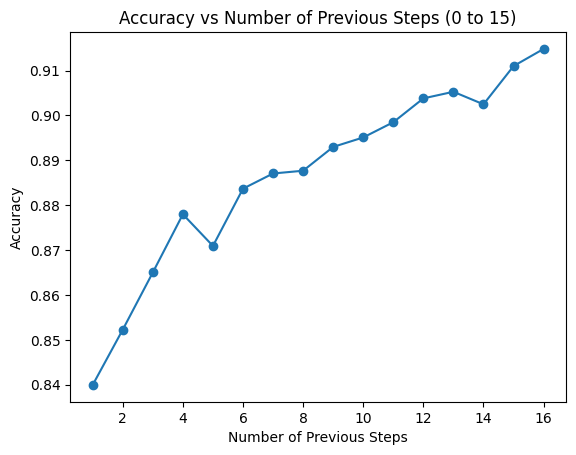

In [ ]:
max_accuracy = max(accuracies)
best_num_previous_steps = num_previous_steps_range[accuracies.index(max_accuracy)]

print(f"Highest Accuracy: {max_accuracy:.4f} (Number of Previous Steps: {best_num_previous_steps})")

plt.plot(num_previous_steps_range[:16], accuracies[:16], marker='o')
plt.xlabel('Number of Previous Steps')
plt.ylabel('Accuracy')
plt.title('Accuracy vs Number of Previous Steps (0 to 15)')
plt.show()
